In [110]:
from arguments import get_args
from utils import get_db, get_all_documents, convert_to_bio_format_bengali
import pandas as pd
import numpy as np

In [4]:
db = get_db('root_user', 'Bang1adesh', 'NLU')
collection = db['data_gen']

In [5]:
documents = get_all_documents(collection)

In [15]:
df = pd.DataFrame.from_records(documents)
# df.drop('_id', axis=1, inplace=True)

Text(0.5, 1.0, 'Number of samples per intent')

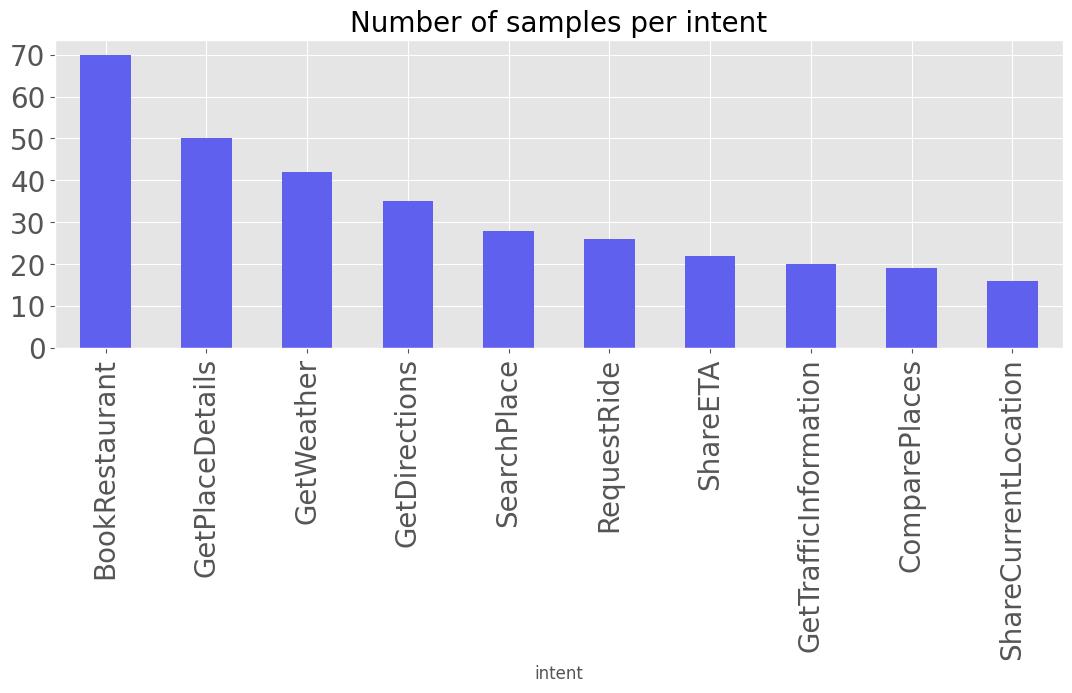

In [90]:
df['intent']\
.value_counts()\
.plot(kind='bar', figsize=(13, 4), color='#6060ee', rot=90, fontsize=20)\
.set_title(label='Number of samples per intent', fontsize=20)



In [145]:
intent_list = df['intent'].value_counts().keys()
intent_table = {}
threshold = 0.30

for intent in intent_list:
    new_intent = {}
    df_intent = df[df['intent']==intent]
    intent_slots = pd.DataFrame.from_records(list(df_intent['English_Slots']))
    intent_slots.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    total = len(intent_slots)
    for column in intent_slots.columns:
        new_intent[column] = (intent_slots[column].notnull().sum() / total) > threshold
    true_count = 0
    false_count = 0
    for key, value in new_intent.items():
        if value:
            true_count += 1
        else:
            false_count += 1
    intent_table[intent] = {'frequent': true_count, 'infrequent': false_count}
    # print(f'Intent: {intent}, Count: {len(df_intent)}')
print(intent_table)
dataFrame = pd.DataFrame.from_dict(intent_table, orient='index')
print(dataFrame)

{'BookRestaurant': {'frequent': 3, 'infrequent': 0}, 'GetPlaceDetails': {'frequent': 1, 'infrequent': 17}, 'GetWeather': {'frequent': 2, 'infrequent': 0}, 'GetDirections': {'frequent': 1, 'infrequent': 8}, 'SearchPlace': {'frequent': 4, 'infrequent': 7}, 'RequestRide': {'frequent': 2, 'infrequent': 3}, 'ShareETA': {'frequent': 1, 'infrequent': 0}, 'GetTrafficInformation': {'frequent': 1, 'infrequent': 2}, 'ComparePlaces': {'frequent': 3, 'infrequent': 2}, 'ShareCurrentLocation': {'frequent': 1, 'infrequent': 1}}
                       frequent  infrequent
BookRestaurant                3           0
GetPlaceDetails               1          17
GetWeather                    2           0
GetDirections                 1           8
SearchPlace                   4           7
RequestRide                   2           3
ShareETA                      1           0
GetTrafficInformation         1           2
ComparePlaces                 3           2
ShareCurrentLocation          1           

Text(0.5, 1.0, 'Number of slot categories per intent')

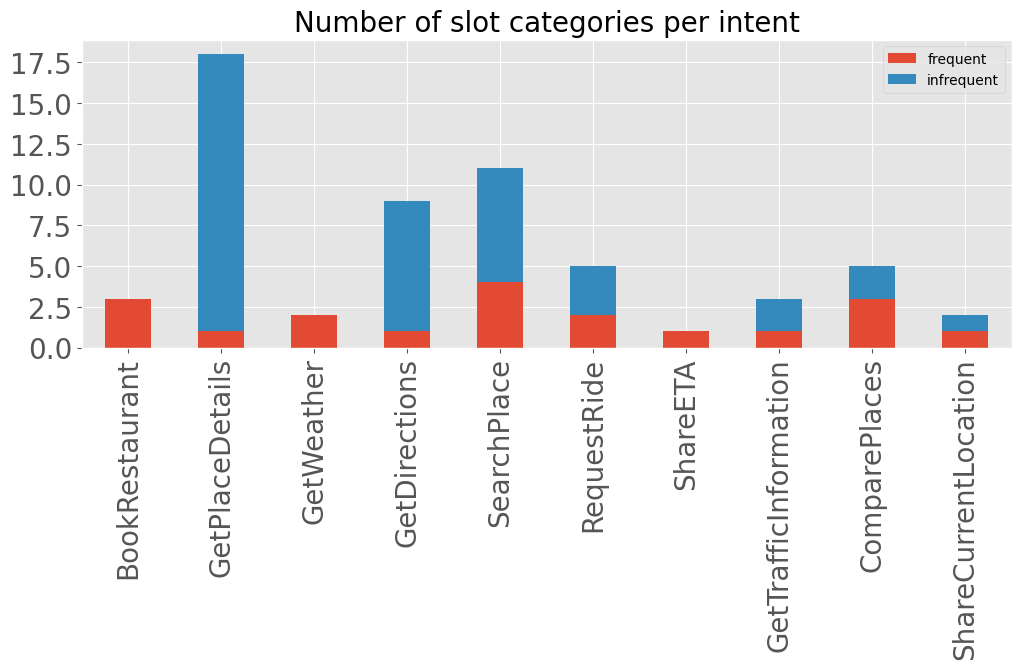

In [146]:
dataFrame\
    .plot(kind='bar', stacked=True, figsize=(12, 4), fontsize=20)\
    .set_title(label='Number of slot categories per intent', fontsize=20)

In [144]:
df['intent'].value_counts().keys()

Index(['BookRestaurant', 'GetPlaceDetails', 'GetWeather', 'GetDirections',
       'SearchPlace', 'RequestRide', 'ShareETA', 'GetTrafficInformation',
       'ComparePlaces', 'ShareCurrentLocation'],
      dtype='object', name='intent')